In [24]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [25]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


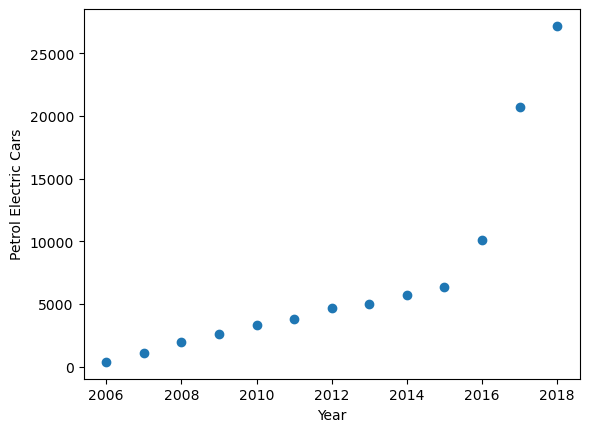

In [26]:
# Generate a scatter plot of year versus number of petrol-electric cars
year = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol-Electric'), 'year']
number = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol-Electric'), 'number']
plt.scatter(year, number)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

In [27]:
# Perform a linear regression on year versus petrol-electric cars
lin_reg = stats.linregress(year, number)
lin_reg

LinregressResult(slope=1697.0, intercept=-3407212.4615384615, rvalue=0.8283085849341516, pvalue=0.0004691419895415732, stderr=346.09265015728346, intercept_stderr=696339.6162150907)

In [28]:
# Create equation of line to calculate predicted number of petrol-electric cars
line_p_e = lin_reg[0] * year + lin_reg[1]

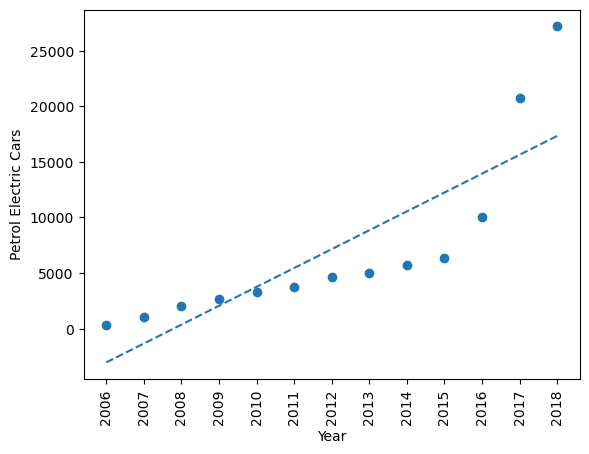

In [29]:
# Plot the linear model on top of scatter plot 
year = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol-Electric'), 'year']
pet_elec = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol-Electric'), 'number']
plt.scatter(year, pet_elec)
plt.plot(year, line_p_e, "--")
plt.xticks(year, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

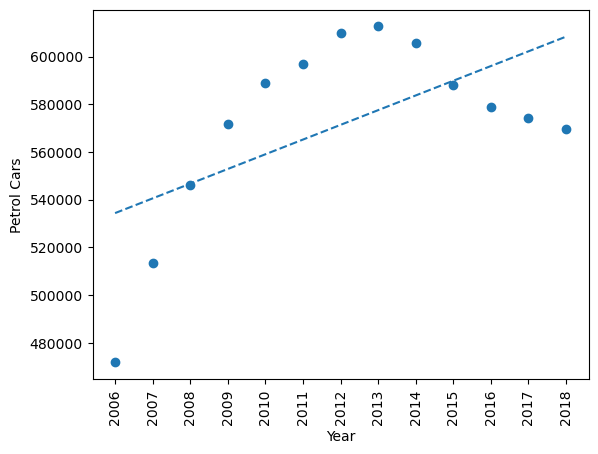

In [30]:
# Repeat plotting scatter and linear model for year versus petrol cars
year = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol'), 'year']
pet = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Petrol'), 'number']
plt.scatter(year, pet)
lin_reg = stats.linregress(year, pet)
line_p = lin_reg[0] * year + lin_reg[1]
plt.plot(year, line_p, "--")
plt.xticks(year, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.show()

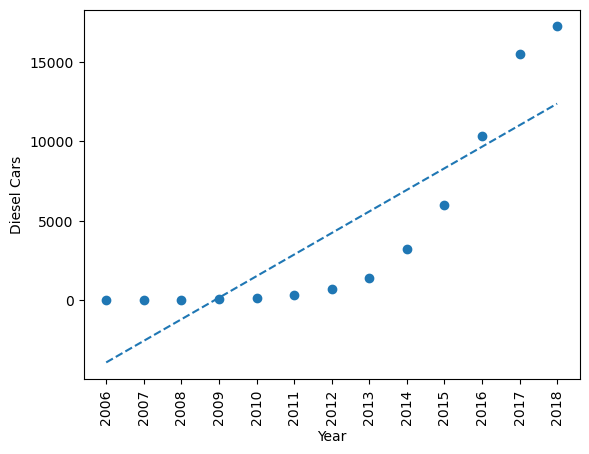

In [31]:
# Repeat plotting scatter and linear model for year versus diesel cars
year = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Diesel'), 'year']
diesel = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & (vehicle_data['engine'] == 'Diesel'), 'number']
plt.scatter(year, diesel)
lin_reg = stats.linregress(year, diesel)
line_d = lin_reg[0] * year + lin_reg[1]
plt.plot(year, line_d, "--")
plt.xticks(year, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Diesel Cars')
plt.show()

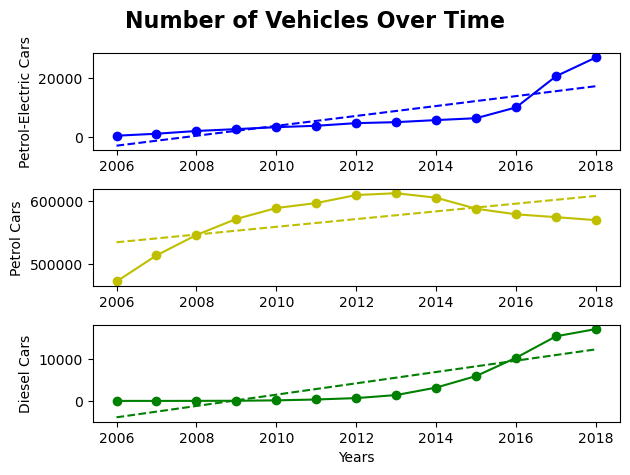

In [44]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle("Number of Vehicles Over Time", fontweight='bold', fontsize=16)

ax1.plot(year, pet_elec, marker='o', color='b')
ax1.plot(year, line_p_e, 'b--')
ax1.set_ylabel('Petrol-Electric Cars')

ax2.plot(year, pet, marker='o', color='y')
ax2.plot(year, line_p, 'y--')
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, diesel, marker='o', color='g')
ax3.plot(year, line_d, 'g--')
ax3.set_ylabel('Diesel Cars')
ax3.set_xlabel('Years')

plt.tight_layout()
plt.show()

In [49]:
# Calculate the number of cars for 2024
pe2024 = stats.linregress(year, pet_elec)[0] * 2024 + stats.linregress(year, pet_elec)[1]
p2024 = stats.linregress(year, pet)[0] * 2024 + stats.linregress(year, pet)[1]
d2024 = stats.linregress(year, diesel)[0] * 2024 + stats.linregress(year, diesel)[1]
print(f'''The number of petrol-electic cars in 2024 will be {round(pe2024):.1f}.
The number of petrol cars in 2024 will be {round(p2024):.1f}.
The number of diesel cars in 2024 will be {round(d2024):.1f}.''')

The number of petrol-electic cars in 2024 will be 27516.0.
The number of petrol cars in 2024 will be 645370.0.
The number of diesel cars in 2024 will be 20541.0.
